# Direcciones,
# Deuda Alquimia,
# y las Transformas

<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/master/10_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparar el Espacio (Prepare the Space)

In [2]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git
! pip install eciespy eth_keys cryptos qrcode base58 

Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 925, done.
remote: Counting objects: 100% (739/739), done.
remote: Compressing objects: 100% (712/712), done.
remote: Total 925 (delta 494), reused 29 (delta 25), pack-reused 186
Receiving objects: 100% (925/925), 57.60 MiB | 11.14 MiB/s, done.
Resolving deltas: 100% (606/606), done.
     |████████████████████████████████| 69 kB 3.1 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 555 kB 24.5 MB/s 
     |████████████████████████████████| 2.0 MB 63.6 MB/s 
     |████████████████████████████████| 105 kB 70.5 MB/s 
     |████████████████████████████████| 481 kB 64.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230852 sha256=bab94692f5c3dc65db950b3403994b4fad9f5d2231fae6d901ce7ad9eccbf4cb
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for qrcode: filen

## Importaciones y Definiciones (Imports and Definitions)

Crear funciones para generar pares de claves y direcciones de criptomonedas.
***
Create functions for generating key pairs and cryptomoneda addresses.

In [3]:
import hashlib
import os
import getpass
import ecies
import eth_keys
import cryptos
import qrcode
import base58
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from Crypto.Random import get_random_bytes

#def gen_privKey():
#    privKey=eth_keys.keys.PrivateKey(get_random_bytes(32) )
#    return privKey

doge=cryptos.Doge()

In [5]:
privnum_try=get_random_bytes(32)
addy_try=doge.privtoaddr(privnum_try)
addy_try

'DPjodFZzqCg9xppTJT7xADCAAxWBufg3HL'

In [6]:
import getpass
passwrd=getpass.getpass('password')


password··········


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
! ls 

Colegio_Invisible  drive  sample_data


In [9]:
! ls drive/MyDrive

 cinv  'Colab Notebooks'   test


In [13]:
exe_string=f'python Colegio_Invisible/scripts/ecc_keyboard.py drive/MyDrive/cinv/vanity3_privkey.bin {passwrd} {privnum_try.hex()}'
!{exe_string}


Key generation complete
Generación de la clave está hecho
La clave esta cifrada y escrita en un archivo binario:
Key encrypted and written to binary file: drive/MyDrive/cinv/vanity3_privkey.bin
bb15fac8434fe837545fae1c32210f0df92d3eb8b9c6f7f2a5fc64ca1e255cd4fd8a543f0696d7dbac53a60191fe2c66b79f96f3c98b4cec9bd77957137e1271


In [ ]:
match_text='dcris'.lower()
length=len(match_text)
i=0
while True:
  #if i%100_000==0:
  #  print(i)
  # i=i+1
  privnum_try=get_random_bytes(32)
  addy_try=doge.privtoaddr(privnum_try)
  if addy_try[:length].lower()==match_text:
    break
print(addy_try)

exe_string=f'python Colegio_Invisible/scripts/ecc_keyboard.py drive/MyDrive/cinv/cris_prv.enc {passwrd} {privnum_try.hex()}'
!{exe_string}

In [10]:
def gen_save_keys_addr(basename_filepath,password=None,coin='Doge'):
    if os.path.isfile(basename_filepath+'_prv.enc'):
        privkey2save=import_privKey(basename_filepath+'_prv.enc',password)
    else:
        privkey2save = ecies.utils.generate_eth_key()
    pubkey2save = privkey2save.public_key    
    save_privkey(privkey2save,basename_filepath+'_prv.enc',password=password)
    save_pubkey(pubkey2save,basename_filepath+'_pub.bin')
    if coin[0].lower()=='d':
      doge = cryptos.Doge()
    else:
      doge = cryptos.Bitcoin()
    addr2save=doge.pubtoaddr('04'+pubkey2save.to_bytes().hex())
    save_addr(addr2save,basename_filepath+'_addr.bin')
    return make_qr(addr2save,basename_filepath+'_addr.png')

def save_privkey(privkey,privkey_filepath,password=None):
    if password==None:
        while True:
                password = getpass.getpass("Input password for encrypting keyfile: ")
                password_2 = getpass.getpass("Repeat password for encrypting keyfile: ")
                if password==password_2:
                    print('\nPasswords match...')
                    break
                else:
                    print('\nPasswords do not match...')
    encrypted_bytes=ecies.aes_encrypt(key=hashlib.sha256(password.encode()).digest(),
                                      plain_text=privkey.to_bytes())
    open(privkey_filepath,'wb').write(encrypted_bytes)
    print(f'Password protected file written to {privkey_filepath} containing {encrypted_bytes.hex()}')
    
def save_pubkey(pubkey,pubkey_filepath):
    open(pubkey_filepath,'wb').write(pubkey.to_bytes())
    print(f'File written to {pubkey_filepath} containing {pubkey.to_bytes().hex()}')
    
def save_addr(addr,addr_filepath):
    open(addr_filepath,'wb').write(addr.encode())
    print(f'Address written to {addr_filepath} containing {addr}')

def make_qr(data,image_path=None):
    qr = qrcode.QRCode(version=1,box_size=5,border=2)
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill='black', back_color='white')
    if image_path!=None:
        img.save(image_path)
    return img

def import_privKey(privkey_filepath,password=None):
    if password==None:
        password = getpass.getpass("Input password for decrypting keyfile: ")
    password=password.encode()
    f=open(privkey_filepath,'rb')
    decrypted_bytes=ecies.aes_decrypt(key=hashlib.sha256(password).digest(),cipher_text=f.read())
    privKey=eth_keys.keys.PrivateKey(decrypted_bytes)
    return privKey

def import_pubKey(pubkey_filepath):
    f=open(pubkey_filepath,'rb')
    privKey=eth_keys.keys.PublicKey(f.read())
    return privKey

def import_addr(addr_filepath):
    return open(addr_filepath,'rb').read().decode()


Password protected file written to chris_prv.enc containing cdfa2ad97e6d7746f55f67028ad6df9e84a0ff50f9fb064f131d271f5ad025eb771c40f3f290c8ff67ffb1f533fc048d887a9d77b82c84a869abf5c4c98b2344
File written to chris_pub.bin containing f494114c924db44cf140d4799af72d9410581eb4af04527ddada2a9e859210647a574e4b050b42a0ccb3d5ad3a16e43e5d09f1f4f5ea1abeaa27e3e7b0f645dd
Address written to chris_addr.bin containing DCwoowQ3mLkM2DMahLGH9h6qndjZ8k23Ty


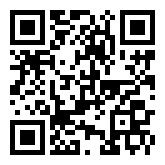

In [11]:
gen_save_keys_addr('cris',password="",coin='Doge')

In [24]:
base58.alphabet

b'123456789ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz'

In [26]:
58**4

11316496